In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/wtitze/3E/main/Medals.xlsx'
medals = pd.read_excel(url)
medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [3]:
medals =medals.drop(columns= ['Total', 'Rank by Total'])
medals

,Rank,Team/NOC,Gold,Silver,Bronze
0,1,United States of America,39,41,33
1,2,People's Republic of China,38,32,18
2,3,Japan,27,14,17
3,4,Great Britain,22,21,22
4,5,ROC,20,28,23
...,...,...,...,...,...
88,86,Ghana,0,0,1
89,86,Grenada,0,0,1
90,86,Kuwait,0,0,1
91,86,Republic of Moldova,0,0,1


In [4]:
medals =medals.drop(columns= ['Rank'])
medals

,Team/NOC,Gold,Silver,Bronze
0,United States of America,39,41,33
1,People's Republic of China,38,32,18
2,Japan,27,14,17
3,Great Britain,22,21,22
4,ROC,20,28,23
...,...,...,...,...
88,Ghana,0,0,1
89,Grenada,0,0,1
90,Kuwait,0,0,1
91,Republic of Moldova,0,0,1


In [5]:
medals.rename(columns={'Team/NOC':'Team'}, inplace=True)
medals

,Team,Gold,Silver,Bronze
0,United States of America,39,41,33
1,People's Republic of China,38,32,18
2,Japan,27,14,17
3,Great Britain,22,21,22
4,ROC,20,28,23
...,...,...,...,...
88,Ghana,0,0,1
89,Grenada,0,0,1
90,Kuwait,0,0,1
91,Republic of Moldova,0,0,1


1. visualizzare il numero di medaglie d’oro vinte dall’Italia

In [6]:
medals[medals['Team']== 'Italy']['Gold']

9    10
Name: Gold, dtype: int64

2. visualizzare il numero di medaglie d’oro delle nazioni che cominciano con la lettera F

In [7]:
medals[medals['Team'].str.startswith('F')][['Team','Gold']]

,Team,Gold
7,France,10
59,Fiji,1
84,Finland,0


visulizzare il grafico delle medaglie d'oro vinte dalle nazione che inizaiano con la lettera 'F'

<BarContainer object of 3 artists>

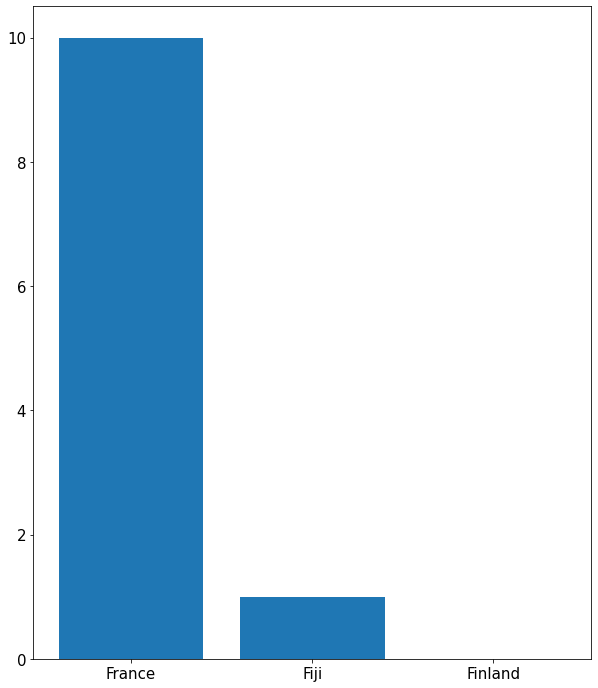

In [8]:
x = list(medals[medals['Team'].str.startswith('F')]['Team'])
y = list(medals[medals['Team'].str.startswith('F')]['Gold'])

plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(10,12))
ax = plt.axes()
ax.bar(x,y)

3. Aggiungere una colonna contenente il numero totale di medaglie di ogni nazione. Chiamare la colonna “Total”

In [9]:
medals['Total'] =medals['Gold'] + medals['Silver'] + medals['Bronze']
medals

,Team,Gold,Silver,Bronze,Total
0,United States of America,39,41,33,113
1,People's Republic of China,38,32,18,88
2,Japan,27,14,17,58
3,Great Britain,22,21,22,65
4,ROC,20,28,23,71
...,...,...,...,...,...
88,Ghana,0,0,1,1
89,Grenada,0,0,1,1
90,Kuwait,0,0,1,1
91,Republic of Moldova,0,0,1,1


4. Visualizzare la nazione che ha vinto più medaglie (in totale)

In [10]:
medals[medals['Total']== medals['Total'].max()]['Team']

0    United States of America
Name: Team, dtype: object

5. Visualizzare il numero totale di medaglie vinte complessivamente da tutte le nazioni

In [11]:
medals['Total'].sum()

1080

6. aggiungere una colonna contenente la percentuale di medaglie vinte da ogni nazione. Chiamare la colonna “Percentuale”


In [12]:
url = "https://raw.githubusercontent.com/wtitze/3E/main/Teams.xlsx"

teams = pd.read_excel(url)
teams

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women
...,...,...,...,...
738,South Africa,Water Polo,South Africa,Women
739,Spain,Water Polo,Spain,Men
740,Spain,Water Polo,Spain,Women
741,United States,Water Polo,United States of America,Men


In [ ]:
#eliminazione colonna nonn necessaria
teams.drop(columns = ("Name"), inplace = True)
teams

7. Visualizzare il numero di squadre per ogni sesso

In [13]:
teams.groupby("Event")["NOC"].count()

Event
4 x 400m Relay Mixed                 15
Baseball                              6
Duet                                 22
Group All-Around                     14
Men                                 120
Men's 4 x 100m Freestyle Relay       16
Men's 4 x 100m Medley Relay          16
Men's 4 x 100m Relay                 16
Men's 4 x 200m Freestyle Relay       16
Men's 4 x 400m Relay                 16
Men's Foil Team                       9
Men's Madison                        16
Men's Sabre Team                      9
Men's Team                           40
Men's Team Pursuit                    8
Men's Team Sprint                     8
Men's Épée Team                       9
Mixed 4 x 100m Medley Relay          16
Mixed Doubles                        16
Mixed Relay                          18
Mixed Team                           29
Softball                              6
Team                                 10
Women                               114
Women's 4 x 100m Freestyle Relay  

8. Visualizzare il numero di discipline a cui ha partecipato ogni nazione. Ordinare in ordine decrescente a partire dalla nazione che ha presentato più squadre. Contare insieme squadre maschili e femminili

In [14]:
teams.groupby("NOC")["Discipline"].count().sort_values(ascending=False)

NOC
Japan                       48
United States of America    47
Italy                       37
Germany                     36
Australia                   35
                            ..
Vietnam                      1
Honduras                     1
Ghana                        1
Estonia                      1
Angola                       1
Name: Discipline, Length: 84, dtype: int64

9. Visualizzare il numero di nazioni che hanno partecipato alle varie discipline. Ordinare in ordine decrescente in base alla disciplina che ha avuto più squadre partecipanti

In [15]:
teams.groupby("Discipline")["NOC"].count().sort_values(ascending=False)

Discipline
Swimming               113
Athletics               79
Cycling Track           64
Archery                 53
Fencing                 52
Table Tennis            48
Beach Volleyball        48
Artistic Swimming       32
Football                28
Rugby Sevens            24
Artistic Gymnastics     24
Hockey                  24
Handball                24
Volleyball              24
Basketball              24
Water Polo              22
Triathlon               18
3x3 Basketball          16
Rhythmic Gymnastics     14
Baseball/Softball       12
Name: NOC, dtype: int64

10. Visualizzare il nome della nazione che ha portato più squadre

In [16]:
teams2 = teams.groupby("NOC").count()
teams2.loc[teams2["Discipline"] == teams2["Discipline"].max()]

,Name,Discipline,Event
NOC,,,
Japan,48,48,48


11. Eliminare la colonna “Event”

In [17]:
teams.drop(columns = ("Event"), inplace = True)
teams

,Name,Discipline,NOC
0,Belgium,3x3 Basketball,Belgium
1,China,3x3 Basketball,People's Republic of China
2,China,3x3 Basketball,People's Republic of China
3,France,3x3 Basketball,France
4,Italy,3x3 Basketball,Italy
...,...,...,...
738,South Africa,Water Polo,South Africa
739,Spain,Water Polo,Spain
740,Spain,Water Polo,Spain
741,United States,Water Polo,United States of America


12. Rinominare la colonna NOC in “Name”

In [18]:
teams.rename(columns = {"NOC" : "Name"}, inplace = True)
teams

,Name,Discipline,Name
0,Belgium,3x3 Basketball,Belgium
1,China,3x3 Basketball,People's Republic of China
2,China,3x3 Basketball,People's Republic of China
3,France,3x3 Basketball,France
4,Italy,3x3 Basketball,Italy
...,...,...,...
738,South Africa,Water Polo,South Africa
739,Spain,Water Polo,Spain
740,Spain,Water Polo,Spain
741,United States,Water Polo,United States of America
